In [51]:
import IPython.display as ipd
% pylab inline
import os
import librosa
import librosa.display
import pandas as pd
import glob 
from sklearn.preprocessing import LabelEncoder


Populating the interactive namespace from numpy and matplotlib


In [80]:
data, sampling_rate = librosa.load('/Users/shikhagupta/Desktop/animal/NFT Sounds/Dog/dogs.mp3')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shikhagupta/Desktop/animal/NFT Sounds/Dog/dogs.mp3'

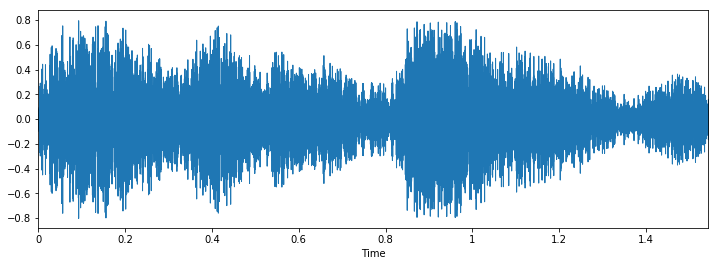

In [54]:


plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [55]:
data1, sampling_rate = librosa.load('/Users/shikhagupta/Desktop/animal/nftsounds/Elephant/elephan6 (1).mp3')

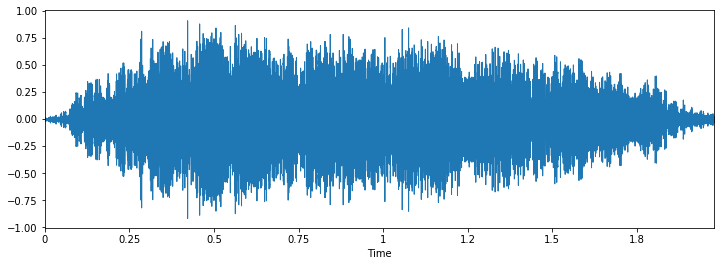

In [56]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data1, sr=sampling_rate)

In [57]:
elephant=[]

In [58]:
path = '/Users/shikhagupta/Desktop/animal/nftsounds/Elephant/'


In [61]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled
    

In [77]:
features = []
for filename in glob.glob(os.path.join(path, '*.mp3')):
    # do your stuff
   
    #d,sampling_rate = librosa.load(filename)
    #mfccs = np.mean(librosa.feature.mfcc(y=d, sr=sample_rate, n_mfcc=40).T,axis=0)
    elephant.append(d)
    data = extract_features(filename)
    features.append([data, "elephant"])

featuresdf = pd.DataFrame(features, columns=['feature','class_label'])
    

In [76]:
print(len(features))
print(len(featuresdf))

9
9


In [79]:
print(featuresdf)

                                             feature class_label
0  [-124.70614199041682, 195.19656124326548, -53....    elephant
1  [-199.28490824759217, 176.52533269502436, -91....    elephant
2  [-120.49118136825949, 137.434002118908, -132.3...    elephant
3  [-183.08887123070693, 181.3369378013885, -89.4...    elephant
4  [-246.02034246424958, 122.96516476695308, -65....    elephant
5  [-85.09307774558673, 121.22709911330324, -54.7...    elephant
6  [-189.0855275564496, 164.60785857967002, -90.3...    elephant
7  [-147.55477250118886, 217.9647587092899, -37.1...    elephant
8  [-147.55477250118886, 217.9647587092899, -37.1...    elephant


In [78]:
for x in featuresdf:
    print("output")
    print(x) 
    #plt.figure(figsize=(12, 4))
    #librosa.display.waveplot(x)
    

output
feature
output
class_label


In [38]:
print(sampling_rate)

22050


In [49]:
import struct
class WavFileHelper():
    def read_file_properties(self, filename):
        wave_file = open(filename,"rb")
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]
        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]
        return (num_channels, sample_rate, bit_depth)